### Clustering

Next, we can apply clustering techniques in an effort to identify useful customer segmentation. Although we only have two groups in our data that we want to distinguish ('converted' and 'not converted'), there may be any number of different 'types' of customers that can help us identify the strength of a lead.  By clustering, we can see if the data show distinct types of customers, and use our labels to determine whether the groups found have anything to do with the likelihood of conversion.

In [74]:
# For KMeans, we should explore a range of k values to find the most efficient number of clusters in our data.
ks = range(2,41, 2)
inertias = []
for k in ks:
    model_km = KMeans(n_clusters = k, random_state=123)
    model_km.fit(X_scaled)
    inertias.append(model_km.inertia_)

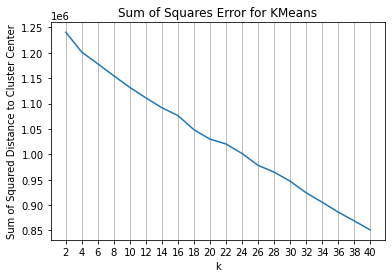

In [75]:
plt.plot(ks, inertias)
plt.title('Sum of Squares Error for KMeans')
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('Sum of Squared Distance to Cluster Center')
plt.grid(axis='x');

Looking across a wide range of values for the number of clusters (k), there doesn't appear to be an obvious 'elbow' in the observed SS. Instead, the error decreases steadily as k increases. This probably indicates that there is not a very reliable segmentation of the data that can provide us information about different groups or types of leads. Before we give up, however, let's try DBSCAN, which might be better if the clusters are irregularly shaped.

In [78]:
model = KMeans(n_clusters=4)
x_km_distance = model.fit_transform(X_scaled)
distances = pd.DataFrame(x_km_distance)
distances.mean()

0    11.148838
1    21.024631
2     9.522431
3     9.568689
dtype: float64

In [129]:
windows = [10]
ks = {}
sil_scores = {}
for w in windows:
    model = DBSCAN(eps=w, min_samples = 50)
    labels = model.fit_predict(X_scaled)
    n_clusters = len(set(model.labels_))
    ks[w] = n_clusters
    try:
        sil_score = round(silhouette_score(X_scaled, labels), 3)
    except ValueError:
        sil_score = 'N/A'
    sil_scores[w] = sil_score

for w in sil_scores:
    print('Neighborhood size {}: {} clusters, silhouette score = {}'.format(round(w,2), ks[w], sil_scores[w]))

Neighborhood size 10: 6 clusters, silhouette score = 0.213


4


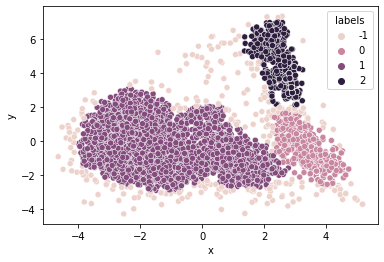

In [130]:
X_2D = X_pca[:, 0:2]
model = DBSCAN(eps=0.45, min_samples=50)
labels = model.fit_predict(X_2D)
n_clusters = len(set(model.labels_))
print(n_clusters)
df = pd.DataFrame(X_2D, columns=['x', 'y'])
df['labels'] = labels
sns.scatterplot(data=df, x='x', y='y', hue='labels');

<AxesSubplot:xlabel='labels', ylabel='count'>

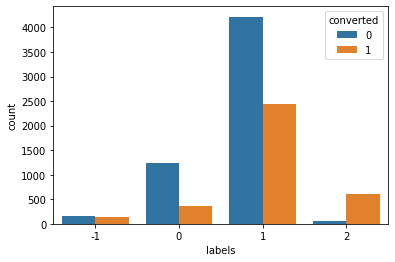

In [133]:
df['converted'] = y
sns.countplot(data=df, x='labels', hue='converted')